<a href="https://colab.research.google.com/github/y-ali0/Diffraction/blob/main/Exercise_2_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Core Task 1**

In [ ]:
''' Importing required modules '''
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Relative Intensity')

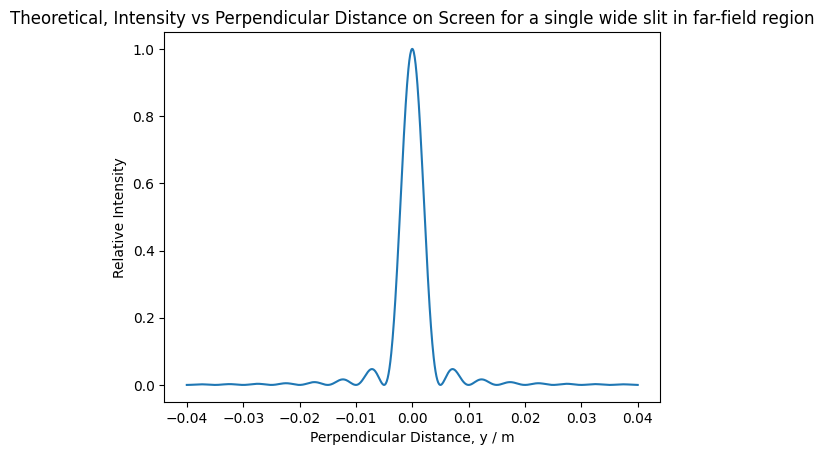

In [ ]:
# Theoretical

# After solving the integral we obtain the below

def theorypsi(y, k, d, D):
  return d * np.sinc(k * y * d/( 2 * D ) * 1/np.pi)

k = 2*np.pi / (500e-9)
d = 100e-6
D = 1.0
L = 5e-3

perpdist = np.linspace(-4e-2, 4e-2, 1000)

# Normalising so that the maximum height of the function is 1

plt.plot(perpdist, abs(theorypsi(perpdist, k, d, D))**2/(np.max(theorypsi(perpdist, k, d, D))**2))
plt.title('Theoretical, Intensity vs Perpendicular Distance on Screen for a single wide slit in far-field region')
plt.xlabel('Perpendicular Distance, y / m')
plt.ylabel('Relative Intensity')

Number in  the slit:  1310


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


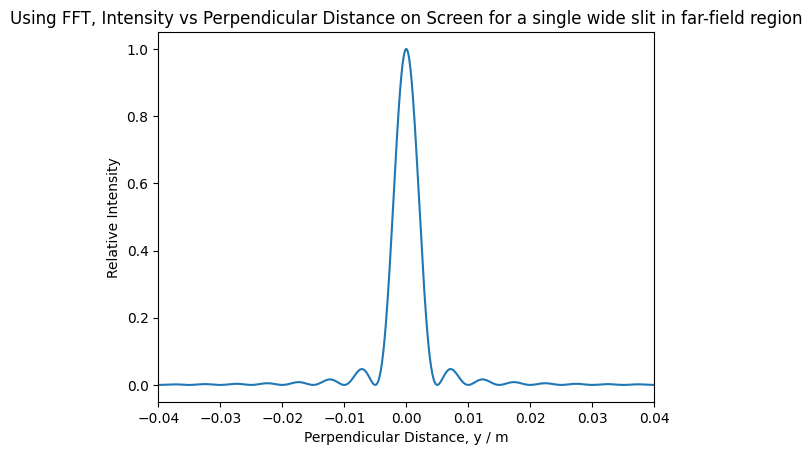

In [ ]:
# Top Hat Slit Function Simulated


# Fraunhofer integral is psi(y) = integral(-a/2, a/2) of exp(-i k x y /D) . dx


# Creating the data

wlength = 500e-9
swidth = 100e-6 # our value of 'd'
Dtoslit = 1.0 # perpendicular distance, 'D', to the slit.


# Number of samples along the slit width

N = int(65536) # equal to fftsize

#'L', the total extent of the aperture, equal to N*Delta

apext = 5e-3

# Can assume thin slit if L >> d

# Sampling width of slit in m:

Delta = apext / N

# Number of samples covering the open part of the slit

Nslit = int(N * swidth / apext)
print('Number in  the slit: ', Nslit)

# Create the aperture function, A:
# One element per sample

A = np.zeros(N)

# Now fill the open slit parts with ones:

A[int((N - Nslit)/2): int((N + Nslit) / 2)] = 1.0

'''
plt.plot(np.linspace(-apext/2, apext/2, N) * 10**3, A)
plt.xlim(10**3*(-swidth/2 - 1e-4), 10**3*(swidth/2  + 1e-4))
plt.xlabel('Distance along slit direction, y / mm')
plt.show()
'''

# Fourier transforming this expected form of A

def psi(A):
  return np.fft.fftshift(np.fft.fft(A))

'''
plt.plot(psi(A))
plt.xlabel('Index')
plt.ylabel('Fourier Amplitude')
plt.show()
'''

# Converting the x axis from index to distance

" Distance = index number x distance per index number " # dist / index no. = Delta

def frequency(n, df):
  "Frequency scaling of the Fourier function, psi"
  # n is the window length, i.e. number of samples
  # df is the sample spacing, i.e. the distance in Hz between each sampling
  return np.fft.fftfreq(n,df)

# np.fft.fftshift(frequency(n = N, df = 1/Delta))

n = np.linspace(-N/2, N/2, N)

''' plt.plot(abs(np.fft.fftshift(psi(A)**2)))
plt.show()

plt.plot( n * Delta , abs(psi(A)))

plt.title('Manually Determining Frequency')

plt.show()
plt.plot(np.fft.fftshift(frequency(N, Delta)), abs(psi(A)))
plt.show() '''

# FFT SHIFT METHOD

# Now convert to length scale

y = np.fft.fftshift(frequency(N, Delta))
plt.plot(y * wlength * D , abs(psi(A))**2/(np.max(psi(A)**2)))

plt.xlabel('Perpendicular Distance, y / m')
plt.ylabel('Relative Intensity')
plt.title('Using FFT, Intensity vs Perpendicular Distance on Screen for a single wide slit in far-field region')
plt.xlim(-4e-2 , 4e-2)
plt.show()

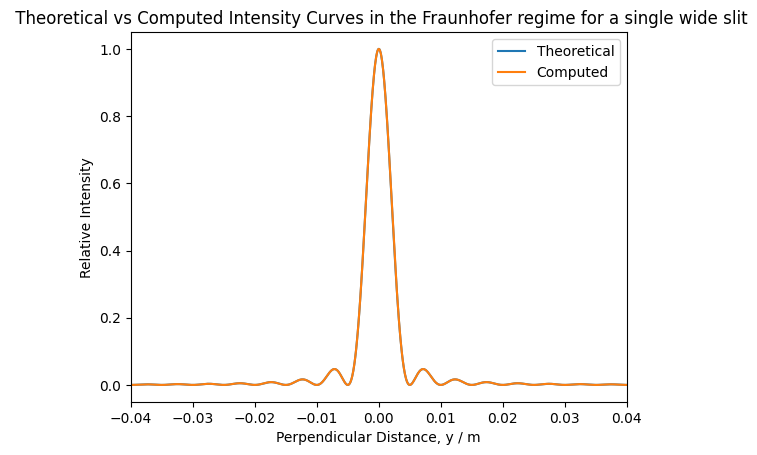

In [ ]:
k = 2*np.pi / (500e-9)
d = 100e-6
D = 1.0
L = 5e-3

perpdist = np.linspace(-4e-2, 4e-2, 1000)
y = np.fft.fftshift(frequency(N, Delta))


plt.plot(perpdist, abs(theorypsi(perpdist, k, d, D))**2/(np.max(theorypsi(perpdist, k, d, D))**2), label = 'Theoretical')
plt.plot(y * wlength * D , abs(psi(A))**2/(np.max(psi(A)**2)), label = 'Computed')
plt.xlabel('Perpendicular Distance, y / m')
plt.ylabel('Relative Intensity')
plt.xlim(-4e-2,4e-2)
plt.title(' Theoretical vs Computed Intensity Curves in the Fraunhofer regime for a single wide slit')
plt.legend()
plt.show()

# The curves overlap perfectly in this region

**Core Task 1 Summary**

I have calculated and plotted the theoretical intensity curve expected in the far-field / Fraunhofer regime for a single-wide slit. Then using FFT techniques, I computed and plotted the intensity curve in the far-field / Fraunhofer regime. I plotted these individually, and when plotted on the same chart, it is clear that the two curves agree in this region.

**Core Task 2**

Text(0.5, 1.0, 'Using FFT, Intensity vs Distance Along Axis of Slit for a sinusoidal phase grating in the far-field region')

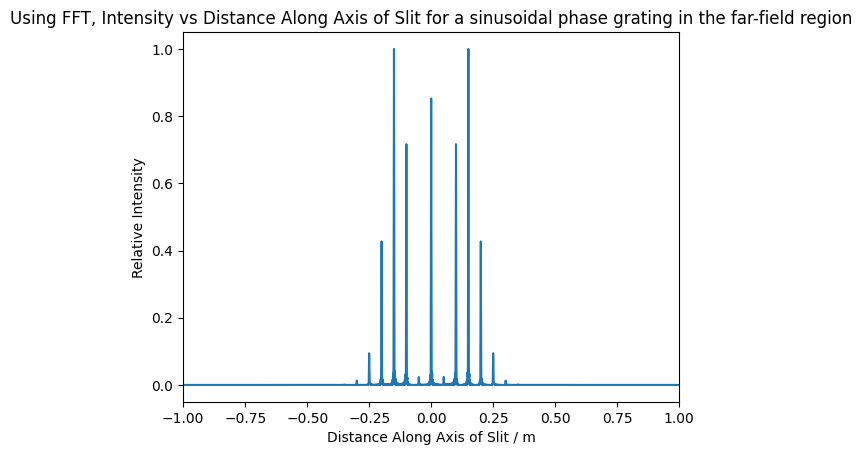

In [ ]:
# Sinusoidal grating

# Updated slit width

d = 2e-3

def grating_phase(x, m, s):
  " This function gives the phase of 'A', where within |x| <= d/2. Its amplitude is 1"
  # m = 8 will be taken
  # x = distance along the slit from centre
  # s = spacing of the phase maxima
  phi = (m/2) * np.sin( 2 * np.pi * x / s )
  return np.exp(1j * phi)

# Parameter values
m = 8
s = 100e-6

# D is chosen to be 10m, which is beyond the Fresnel distance of 8m
D = 10

# Set number of samples

N = int(2**22)

# 'L', the total extent of the aperture, is equal to N*Delta

apext = 5e-3

# Can assume thin slit if L >> d

# Sampling width of slit in m:

Delta = apext / N

# Plot using Fraunhofer diffraction

A = np.zeros(N)

# d is the new width of the slit

Nslit = int(N * d / apext)
A[int((N - Nslit)/2): int((N + Nslit) / 2)] = 1.0

# FT of sinusoidal aperture function

def Asin(A, grating_phase):
  return np.fft.fft(A * grating_phase)


# x is equal to (n - N/2) * Delta for nth position in the array of Asin.

n = np.linspace(0, N, N)

# Distance is (n - N / 2) * apext

x = (n - N / 2) * Delta

slitresult = (abs(Asin(A, grating_phase(x, m = 8, s = 100e-6) )))**2

slitresultnormalised = slitresult / np.max(Asin(A, grating_phase(x, m = 8, s = 100e-6))**2)

#plt.plot(slitresult)
#plt.show()

def perpdistancesin(fftsize, dx):

  return wlength * D * np.fft.fftfreq(fftsize , dx)

# Before we had: y = np.fft.fftshift(frequency(N, Delta))
# Before we had: plt.plot(y * wlength * D , abs(psi(A))**2)

plt.plot(np.fft.fftshift(perpdistancesin(fftsize = N, dx = Delta)), np.fft.fftshift(slitresultnormalised))
plt.xlim(-1, 1)
plt.ylabel('Relative Intensity')
plt.xlabel('Distance Along Axis of Slit / m')
plt.title('Using FFT, Intensity vs Distance Along Axis of Slit for a sinusoidal phase grating in the far-field region')

**Core Task 2 Summary**

I have calculated and plotted the Fraunhofer diffraction pattern for a sinusoidal phase grating with the desired properties and parameters as outlined in the booklet. The resulting pattern clearly shows subsidiary maxima in between the principal maxima.

**Core Task 3**

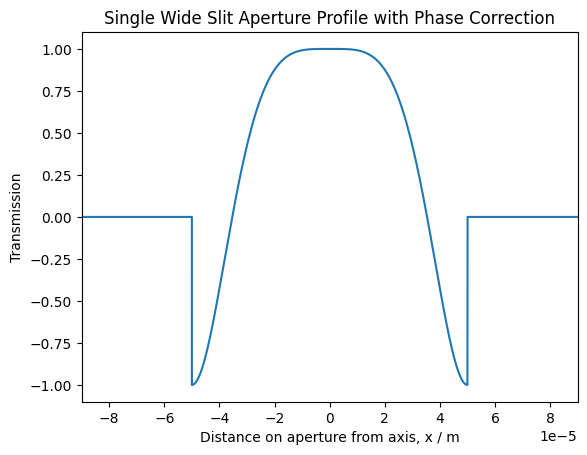

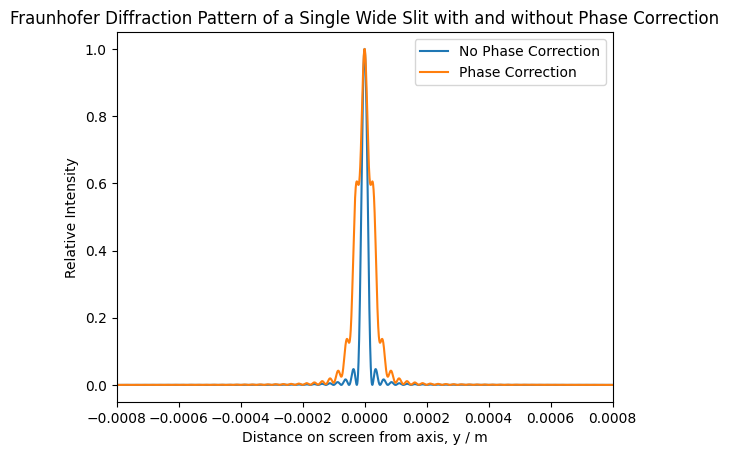

In [ ]:
# SINGLE SLIT

# Firstly, the aperture function is modified by adding in the extra exponential prefactor

# Parameters

L_aperture_width = 5e-3
delta_L_aperture_precision = 1e-8
d_slit_width = 100e-6
lambda_wavelength = 500e-9
D_screen_distance = 5e-3
k = 2*np.pi/lambda_wavelength

# Creating the array to represent the slit
x_aperture = np.arange(start = -L_aperture_width/2, stop = L_aperture_width/2 + delta_L_aperture_precision, step= delta_L_aperture_precision)
# Condition used to make the slit
mask = (x_aperture<d_slit_width/2) & (x_aperture>-d_slit_width/2)
slit = np.multiply(mask,1)
slit_with_prefactor = slit * np.exp((1j*k*x_aperture**2)/(2*D_screen_distance))

# Output from FFT with phase correction

# Perform the FFT, then FFT shift it. Finally, the square of the absolute value is taken to obtain the intensity.
output_prefactor = (np.fft.fft(slit_with_prefactor))
output_fft_shift_prefactor = np.fft.fftshift(output_prefactor)
normalised_intensity_prefactor = np.abs(output_prefactor)**2/np.max(np.absolute(output_prefactor)**2)

# FFT Shift the Intensity Values
normalised_intensity_prefactor = np.fft.fftshift(normalised_intensity_prefactor)

q_prefactor = 2*np.pi*np.fft.fftfreq(len(x_aperture), delta_L_aperture_precision)
q_prefactor = np.fft.fftshift(q_prefactor)
y_screen_prefactor = D_screen_distance*q_prefactor/(k)

# Output from FFT without phase correction

# Perform the FFT, and FFT shift it. Finally, the square of the absolute value is taken to obtain the intensity.
output = (np.fft.fft(slit))
output_fft_shift = np.fft.fftshift(output)
normalised_intensity = np.abs(output)**2/np.max(np.abs(output)**2)

# FFT shift the intensity values
normalised_intensity = np.fft.fftshift(normalised_intensity)

q = 2*np.pi*np.fft.fftfreq(len(x_aperture), delta_L_aperture_precision)
q = np.fft.fftshift(q)
y_screen = D_screen_distance*q/(k)

# Aperture Profile Plot
plt.plot(x_aperture, slit_with_prefactor)
plt.title("Single Wide Slit Aperture Profile with Phase Correction")
plt.xlabel("Distance on aperture from axis, x / m")
plt.ylabel("Transmission")
plt.xlim(-9e-5,9e-5)
plt.show()

# FFT Plot
plt.plot(y_screen, normalised_intensity, label = 'No Phase Correction')
plt.plot(y_screen_prefactor, normalised_intensity_prefactor, label = 'Phase Correction')
plt.title('Fraunhofer Diffraction Pattern of a Single Wide Slit with and without Phase Correction')
plt.xlabel('Distance on screen from axis, y / m')
plt.ylabel('Relative Intensity')
plt.xlim(-8e-4,8e-4)
plt.legend()
plt.show()

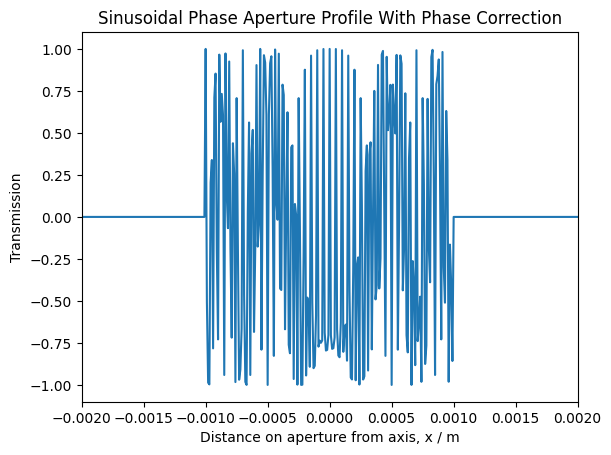

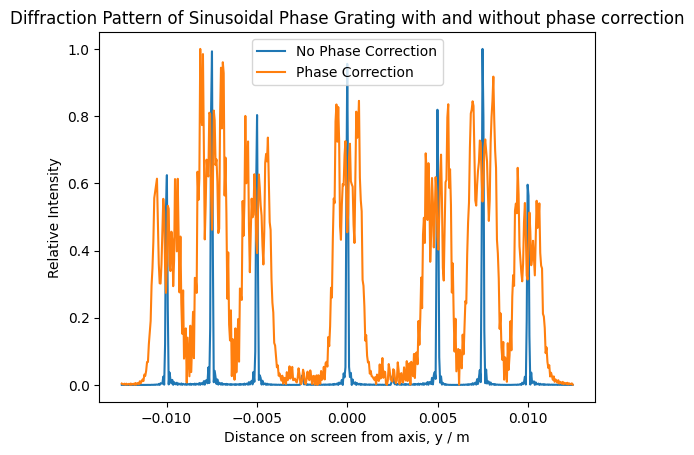

In [ ]:
# SINUSOIDAL PHASE GRATING

# Parameters

L_aperture_width = 5e-3
delta_L_aperture_precision = 1e-5
d_slit_width = 2e-3
m = 8
s = 100e-6

lambda_wavelength = 500e-9
D_screen_distance = 0.5
k = 2*np.pi/lambda_wavelength

# Creating the array to represent the slit
x_aperture = np.arange(start = -L_aperture_width/2, stop = L_aperture_width/2 + delta_L_aperture_precision, step = delta_L_aperture_precision)

# Condition used to make the slit
mask = (x_aperture<d_slit_width/2) & (x_aperture>-d_slit_width/2)
slit = np.multiply(mask,1)

# Slit is created, but now must be multiplied with the required phase

# Creating the phase
phase = []
for i in range(len(slit)):
  if slit[i] == 0:
    phase.append(0)
  elif slit[i] == 1:
    phase.append((m/2)*np.sin(2*np.pi*(x_aperture[i])/s))

# Multiplying the slit by the phase factor
slit_with_phase = slit*np.exp(1j*np.array(phase))
slit_with_phase_and_prefactor = slit_with_phase * np.exp((1j*k*x_aperture**2)/(2*D_screen_distance))

# FFT with phase correction

# Perform the FFT, then FFT shift it. Finally, the square of the absolute value is taken to obtain the intensity.
output_prefactor = (np.fft.fft(slit_with_phase_and_prefactor))
output_fft_shift_prefactor = np.fft.fftshift(output_prefactor)
normalised_intensity_prefactor = np.abs(output_prefactor)**2/np.max(np.abs(output_prefactor)**2)
normalised_intensity_prefactor = np.fft.fftshift(normalised_intensity_prefactor)

q_prefactor = 2*np.pi*np.fft.fftfreq(len(x_aperture), delta_L_aperture_precision)
q_prefactor = np.fft.fftshift(q_prefactor)
y_screen_prefactor = D_screen_distance*q_prefactor/(k)

# FFT without phase correction

# Perform the FFT, then FFT shift it. Finally, the square of the absolute value is taken to obtain the intensity.
output = (np.fft.fft(slit_with_phase))
output_fft_shift = np.fft.fftshift(output)
normalised_intensity = np.abs(output)**2/np.max(np.abs(output)**2)
normalised_intensity = np.fft.fftshift(normalised_intensity)

q = 2*np.pi*np.fft.fftfreq(len(x_aperture), delta_L_aperture_precision)
q = np.fft.fftshift(q)
y_screen = D_screen_distance*q/(k)

# Aperture Profile Plot
plt.plot(x_aperture, slit_with_phase_and_prefactor)
plt.title('Sinusoidal Phase Aperture Profile With Phase Correction')
plt.xlabel('Distance on aperture from axis, x / m')
plt.ylabel('Transmission')
plt.xlim(-0.002,0.002)
plt.show()

# Plot the Intensity Graphs
plt.plot(y_screen, normalised_intensity, label = 'No Phase Correction')
plt.plot(y_screen_prefactor, normalised_intensity_prefactor, label = 'Phase Correction')
plt.title('Diffraction Pattern of Sinusoidal Phase Grating with and without phase correction')
plt.xlabel('Distance on screen from axis, y / m')
plt.ylabel('Relative Intensity')
plt.legend()
plt.show()

**Core Task 3 SUMMARY**

I have added the phase correction to the aperture functions so that the calculations are accurate even in the Fresnel / near-field regime. Moreover, I have plotted the intensity patterns for D = 5e-3 for the single wide slit, and D = 0.5 for the sinusoidal phase grating, and compared the phase corrected pattern to the non phase corrected pattern. The intensity patterns observed for the phase corrected aperture functions do indeed look sensible.

**Supplementary Task 1**

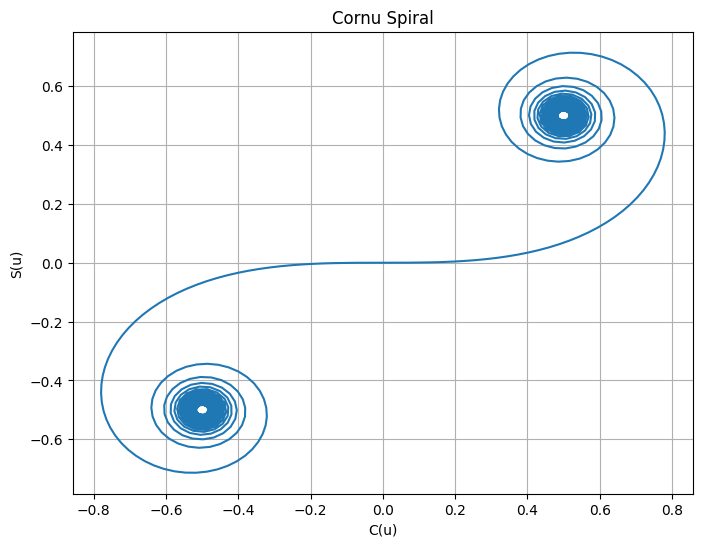

In [ ]:
from scipy.integrate import quad

# Function to evaluate the integrand for C(u)
def integrand_C(x, u):
    return np.cos(np.pi * x**2 / 2)

# Function to evaluate the integrand for S(u)
def integrand_S(x, u):
    return np.sin(np.pi * x**2 / 2)

# Function to evaluate the Fresnel integrals using scipy's quad
def fresnel_integrals(u):
    integral_C, _ = quad(integrand_C, 0, u, args=(u,))
    integral_S, _ = quad(integrand_S, 0, u, args=(u,))
    return integral_C, integral_S

# Generate values of u
u_values = np.linspace(-15, 15, 1000)

# Calculate Fresnel integrals for each u
C_values = []
S_values = []
for u in u_values:
    C, S = fresnel_integrals(u)
    C_values.append(C)
    S_values.append(S)

# Plot the Cornu spiral
plt.figure(figsize=(8, 6))
plt.plot(C_values, S_values)
plt.title('Cornu Spiral')
plt.xlabel('C(u)')
plt.ylabel('S(u)')
plt.grid(True)
plt.show()

**Supplementary Task 1 Summary**

I have managed to successfully write a program to evaluate the Fresnel integrals accurately using a standard integration routine from the scipy, and used this to make a plot of the Cornu spiral using py-plot. I used a standard quadrature technique, 'quad' from scipy.

**Supplementary Task 2**

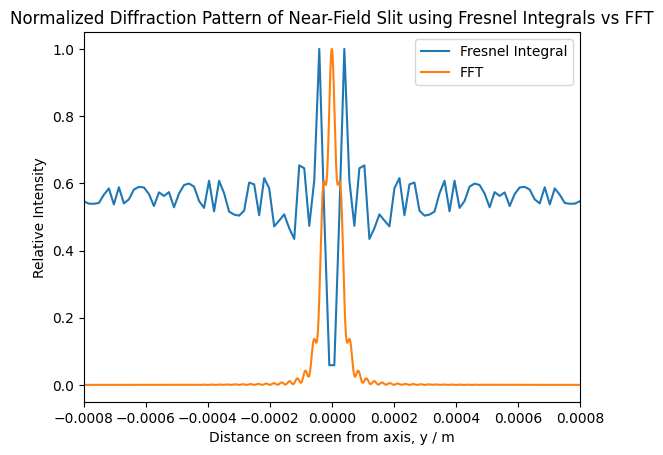

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import fresnel

# Function to calculate the intensity pattern
def calculate_intensity_pattern(x_values, d_slit_width, lambda_wavelength, D_screen_distance):
    # Scaling factor
    scale_factor = np.sqrt(2 / (lambda_wavelength * D_screen_distance))

    # Define integration limits scaled by the scaling factor
    x0_scaled = -d_slit_width / 2 * scale_factor
    x1_scaled = d_slit_width / 2 * scale_factor

    # Initialize intensity pattern array
    intensity_pattern = np.zeros_like(x_values, dtype=float)

    # Calculate Fresnel integrals for each point on the screen
    for i, x in enumerate(x_values):
        scaled_x = x * scale_factor
        C, S = fresnel(scaled_x)

        # Complex amplitude Psi
        Psi = np.exp(1j * np.pi * scaled_x**2 / (2 * D_screen_distance)) * (C + 1j * S)

        # Intensity pattern
        intensity_pattern[i] = np.abs(Psi)**2

    return intensity_pattern

# Parameters
d_slit_width = 100e-6
lambda_wavelength = 500e-9
D_screen_distance = 5e-3

# Generate x-axis values
x_values = np.linspace(-8e-4, 8e-4, 100)

# Calculate intensity pattern
intensity_pattern = calculate_intensity_pattern(x_values, d_slit_width, lambda_wavelength, D_screen_distance)

# Normalize the intensity pattern
intensity_pattern_normalized = intensity_pattern / np.max(intensity_pattern)

# Plot the normalized intensity pattern
plt.plot(x_values, intensity_pattern_normalized, label = 'Fresnel Integral')
plt.title('Normalized Diffraction Pattern of Near-Field Slit using Fresnel Integrals vs FFT')
plt.xlabel('Distance on screen from axis, y / m')
plt.ylabel('Relative Intensity')
plt.xlim(-8e-4, 8e-4)

# SINGLE SLIT

# Firstly, the aperture function is modified by adding in the extra exponential prefactor

# Parameters

L_aperture_width = 5e-3
delta_L_aperture_precision = 1e-8
d_slit_width = 100e-6
lambda_wavelength = 500e-9
D_screen_distance = 5e-3
k = 2*np.pi/lambda_wavelength

# Creating the array to represent the slit
x_aperture = np.arange(start = -L_aperture_width/2, stop = L_aperture_width/2 + delta_L_aperture_precision, step= delta_L_aperture_precision)
# Condition used to make the slit
mask = (x_aperture<d_slit_width/2) & (x_aperture>-d_slit_width/2)
slit = np.multiply(mask,1)
slit_with_prefactor = slit * np.exp((1j*k*x_aperture**2)/(2*D_screen_distance))

# Output from FFT with phase correction

# Perform the FFT, then FFT shift it. Finally, the square of the absolute value is taken to obtain the intensity.
output_prefactor = (np.fft.fft(slit_with_prefactor))
output_fft_shift_prefactor = np.fft.fftshift(output_prefactor)
normalised_intensity_prefactor = np.abs(output_prefactor)**2/np.max(np.absolute(output_prefactor)**2)

# FFT Shift the Intensity Values
normalised_intensity_prefactor = np.fft.fftshift(normalised_intensity_prefactor)

q_prefactor = 2*np.pi*np.fft.fftfreq(len(x_aperture), delta_L_aperture_precision)
q_prefactor = np.fft.fftshift(q_prefactor)
y_screen_prefactor = D_screen_distance*q_prefactor/(k)


plt.plot(y_screen_prefactor, normalised_intensity_prefactor, label = 'FFT')
plt.legend()
plt.show()


**Supplementary Task 2 SUMMARY**

I've computed the Fresnel integrals diffraction pattern for the single wide slit and I have compared the results for this task with the results from the Fourier method used in Core Task 3. We see some unexplained discrepancies, but the general shape is somewhat similar.